In [224]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from pathlib import Path

import matplotlib as plt
import seaborn as sns

In [225]:
PCA_components = 64

USE_GEO = "GEO"

network_type = "vgg16_4096"

standardize_features = True

CITY = "milano"

cities = ['milano', 'bologna', 'firenze', 'palermo', 'torino']

In [226]:
def read_res(city):
    if city==None:
        res_name = '../../results/XGBoost/ALL_XGBoost' +str(PCA_components)\
        + '_' + network_type + '_' + USE_GEO + '_standardized7s.csv'
    else:
        res_name = '../../results/XGBoost/separate_cities/XGBoost'\
        +str(PCA_components) + '_' + city + '_' + network_type \
        + '_' + USE_GEO + '_standardized7s.csv'
    
    return pd.read_csv(res_name).rename(columns={"Unnamed: 0":"metric"})

In [227]:
def get_city_vitality_res(city):
    tmp = read_res(city)["label_activity_density"]
    res = {}
    res["P"] = tmp.iloc[2]
    res["R"] = tmp.iloc[3]
    res["AUC"] = tmp.iloc[0]
    return res

In [228]:
def get_all_vitality_res():
    all_res = {}
    for city in cities:
        all_res[city] = get_city_vitality_res(city)
    all_res['all'] = get_city_vitality_res(city=None)
    return pd.DataFrame.from_dict(all_res, orient='index')

In [229]:
def get_baseline():
    res_name = '../../results/baseline/vitality_pop_density.csv'
    tmp = pd.read_csv(res_name).rename(columns={"Unnamed: 0":"metric"})
    tmp = tmp.set_index('metric')
    return tmp.T.rename(columns={"AUC":"BAUC"}).drop(columns=["Accuracy","Recall","Precision"])

In [230]:
get_baseline()

metric,BAUC
milano,0.852
bologna,0.783
firenze,0.689
palermo,0.933
torino,0.893
all,0.827


In [231]:
get_all_vitality_res()

,P,R,AUC
all,0.910,0.839,0.955
bologna,0.843,0.967,0.933
firenze,0.836,0.714,0.836
milano,0.887,0.895,0.974
palermo,0.808,0.871,0.911
torino,0.870,0.889,0.921


In [247]:
def plot_res():
    
    fig, ax = plt.pyplot.subplots(figsize=(15,5))
    sns.set_style("white")
    sns.set_context("paper")

    df = get_all_vitality_res()
    
    df = df.join(get_baseline())

    df = df.sort_index(ascending=False)


    colors = ["lightskyblue", "cadetblue", "teal", "rosybrown"]


    df.plot.bar(ax=ax, edgecolor = "white", color=colors, alpha=0.777, capsize=3)


    ax.set_xlabel('')

    ax.set_ylim(0,1.06)

    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_yticklabels() + ax.get_xticklabels()):
                item.set_fontsize(18)
                item.set_weight('bold')
                
#     for p in ax.patches:
#         ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    x_offset = -0.08
    y_offset = 0.015
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.2f}".format(b.y1 + b.y0).lstrip('0')        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=15, fontweight="bold")
    
#     plt.axhline(y=0.5, ls='--', color='red')

    labels = [tick.get_text() for tick in ax.get_yticklabels()]

    l = plt.pyplot.legend(bbox_to_anchor=(1.0, 1.0), prop={'size':16, 'weight':'bold'})
#     l.draw_frame(False)

    plt.pyplot.axvline(x=4.5, ls='--', color='gray')


    plt.pyplot.tight_layout()

    plt.pyplot.savefig('../../results/fig/acc_per_city.png', dpi=100)

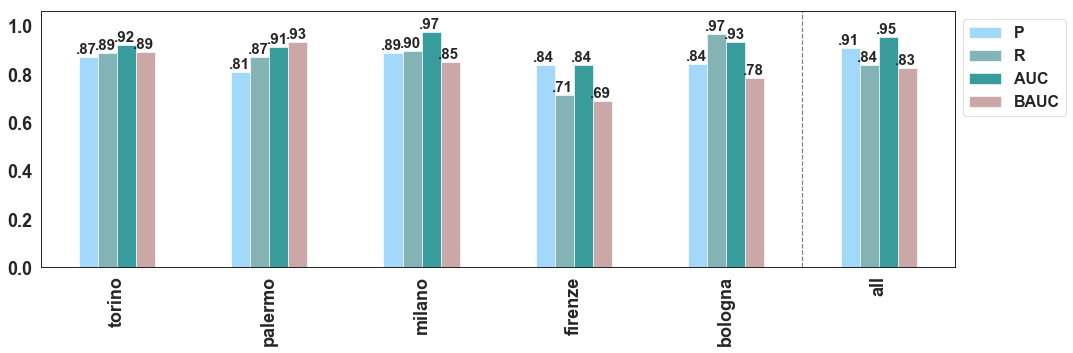

In [248]:
plot_res()